In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
mydata = pd.read_csv("data_main_weather.csv", encoding = 'cp949')

In [97]:
pd.set_option('mode.chained_assignment',  None)

In [98]:
# 이상치 처리1
filtering_outlier = mydata.query('revenue > 180000000')
filtering_outlier_index = list(filtering_outlier.index)

for i in filtering_outlier_index:
    tmp = mydata.loc[i,'mother_code']
    mydata.loc[i,'revenue'] = mydata[mydata['mother_code'] == tmp].sort_values(by='revenue' ,ascending=False)['revenue'].iloc[2]

In [99]:
# 이상치 처리2
filtering = mydata[mydata['revenue']==50000].index
mydata = mydata.drop(filtering)

In [100]:
mydata.dropna(subset=['revenue'], inplace=True)


In [101]:
mydata

,Unnamed: 0,datetime,year,month,date,dayofweek,time,hour,minute,holiday_1,...,installment,code,repeat,holiday,m_temp,l_temp,h_temp,precipitation,역시즌 코드,쇼 유무 코드
0,0,2019-01-01 6:00,2019,1,1,1,6:00:00,6,0,2,...,무관,201072,1,2019-01-01,-2.1,-5.8,2.1,0.1,0,NS
1,1,2019-01-01 6:00,2019,1,1,1,6:00:00,6,0,2,...,무관,201079,1,2019-01-01,-2.1,-5.8,2.1,0.1,0,NS
2,2,2019-01-01 6:20,2019,1,1,1,6:20:00,6,20,2,...,무관,201072,2,2019-01-01,-2.1,-5.8,2.1,0.1,0,NS
3,3,2019-01-01 6:20,2019,1,1,1,6:20:00,6,20,2,...,무관,201079,2,2019-01-01,-2.1,-5.8,2.1,0.1,0,NS
4,4,2019-01-01 6:40,2019,1,1,1,6:40:00,6,40,2,...,무관,201072,3,2019-01-01,-2.1,-5.8,2.1,0.1,0,NS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,38299,2019-12-31 23:40,2019,12,31,1,23:40:00,23,40,0,...,무관,201391,2,2019-12-31,-3.8,-6.7,0.4,0.1,0,NS
38300,38300,2020-01-01 0:00,2020,1,1,2,0:00:00,0,0,2,...,무관,201383,3,2020-01-01,-0.9,-6.5,4.1,0.0,0,NS
38301,38301,2020-01-01 0:00,2020,1,1,2,0:00:00,0,0,2,...,무관,201390,3,2020-01-01,-0.9,-6.5,4.1,0.0,0,NS
38302,38302,2020-01-01 0:00,2020,1,1,2,0:00:00,0,0,2,...,무관,201384,3,2020-01-01,-0.9,-6.5,4.1,0.0,0,NS


In [102]:
list(mydata.columns.values)

['Unnamed: 0',
 'datetime',
 'year',
 'month',
 'date',
 'dayofweek',
 'time',
 'hour',
 'minute',
 'holiday_1',
 'exposure',
 'mother_code',
 'name',
 'category',
 'price',
 'count',
 'revenue',
 'sex',
 'installment',
 'code',
 'repeat',
 'holiday',
 'm_temp',
 'l_temp',
 'h_temp',
 'precipitation',
 '역시즌 코드',
 '쇼 유무 코드']

In [103]:
mydata1 = mydata.drop(['Unnamed: 0',
 'datetime',
 'year',
 'month',
 'date',
 'dayofweek',
 'time',
 'hour',
 'minute',
 'holiday_1',
 'exposure',
 'mother_code',
 'name',
 'category',
 'price',
 'count',
 'sex',
 'installment',
 'code',
 'repeat',
 'm_temp',
 'l_temp',
 'h_temp',
 'precipitation',
 '역시즌 코드',
 '쇼 유무 코드'], axis=1)

In [104]:
mydata1

,revenue,holiday
0,2099000.0,2019-01-01
1,4371000.0,2019-01-01
2,3262000.0,2019-01-01
3,6955000.0,2019-01-01
4,6672000.0,2019-01-01
...,...,...
38299,10157000.0,2019-12-31
38300,50929000.0,2020-01-01
38301,104392000.0,2020-01-01
38302,13765000.0,2020-01-01


In [105]:
mydata1 = mydata1[:32477]
mydata1

,revenue,holiday
0,2099000.0,2019-01-01
1,4371000.0,2019-01-01
2,3262000.0,2019-01-01
3,6955000.0,2019-01-01
4,6672000.0,2019-01-01
...,...,...
35143,37883000.0,2019-11-30
35144,18219000.0,2019-11-30
35145,21526000.0,2019-11-30
35146,20507000.0,2019-11-30


In [106]:
mydata1 =  pd.pivot_table(mydata1, values='revenue', index=['holiday'],  aggfunc=np.sum)
mydata1

,revenue
holiday,
2019-01-01,2.712779e+09
2019-01-02,2.011023e+09
2019-01-03,2.062043e+09
2019-01-04,2.049394e+09
2019-01-05,2.588390e+09
...,...
2019-11-26,2.309144e+09
2019-11-27,2.104695e+09
2019-11-28,2.701481e+09


In [107]:
mydata1_float = mydata1[:].astype(np.float)
mydata1_float

,revenue
holiday,
2019-01-01,2.712779e+09
2019-01-02,2.011023e+09
2019-01-03,2.062043e+09
2019-01-04,2.049394e+09
2019-01-05,2.588390e+09
...,...
2019-11-26,2.309144e+09
2019-11-27,2.104695e+09
2019-11-28,2.701481e+09


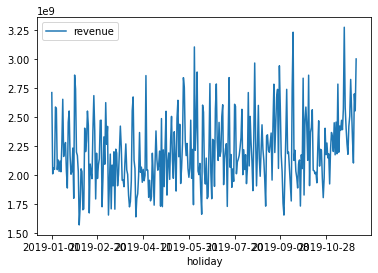

In [108]:
mydata1_float.plot()
plt.show()

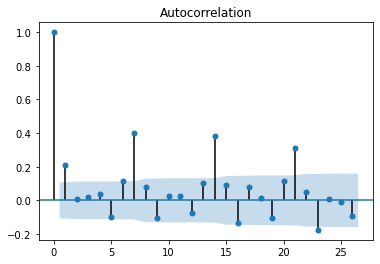

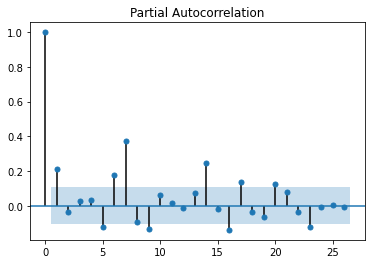

<Figure size 1440x288 with 0 Axes>

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(mydata1_float)
plot_pacf(mydata1_float)
plt.figure(figsize=(20,4))
plt.show()

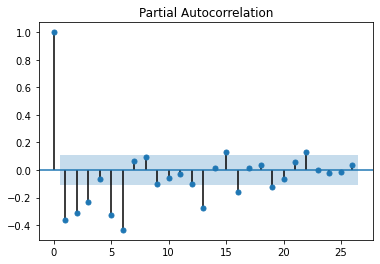

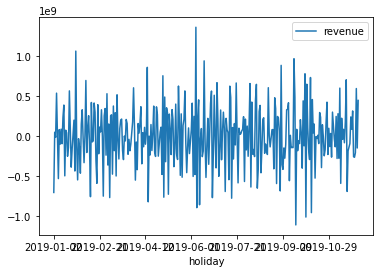

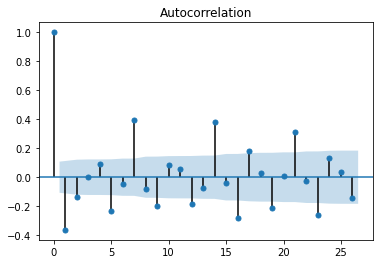

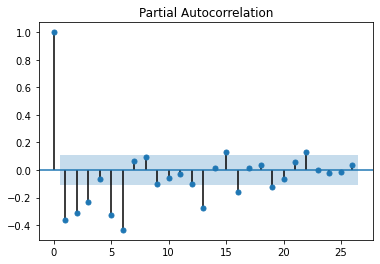

In [110]:
diff_1 = mydata1_float.diff(periods = 1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)

In [111]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(mydata1_float, order = (1,1,0))
model_fit = model.fit(trend = 'c', fill_output =True, disp=1)
model_fit.summary()

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.revenue   No. Observations:                  333
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7027.419
Method:                       css-mle   S.D. of innovations      353786800.437
Date:                Wed, 02 Sep 2020   AIC                          14060.839
Time:                        11:54:00   BIC                          14072.263
Sample:                    01-02-2019   HQIC                         14065.395
                         - 11-30-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.725e+05   1.42e+07      0.062      0.951   -2.69e+07    2.87e+07
ar.L1.D.revenue    -0.3678      0.051     -7.175      0.000      -0.468      -0.267
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7190           +0.0000j            2.7190            0.5000
-----------------------------------------------------------------------------
"""

In [112]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

model = ARIMA(mydata1_float, order = (1,1,0))
model_fit = model.fit(trend = 'nc', fill_output =True, disp=1)
model_fit.summary()

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.revenue   No. Observations:                  333
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -7027.422
Method:                       css-mle   S.D. of innovations      353789768.491
Date:                Wed, 02 Sep 2020   AIC                          14058.845
Time:                        11:54:00   BIC                          14066.461
Sample:                    01-02-2019   HQIC                         14061.882
                         - 11-30-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1.D.revenue    -0.3678      0.051     -7.174      0.000      -0.468      -0.267
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7191           +0.0000j            2.7191            0.5000
-----------------------------------------------------------------------------
"""

In [113]:
'''
c를 nc로 바꾸는 이유는저 모형에 상수를 포함하는 것을
제한함을 의미한다고 해요.

자세한 것은 더 공부해야 겠지만
회귀분석에서 상수를 제한할 때의
원리와 같다고 합니다!
'''

'\nc를 nc로 바꾸는 이유는저 모형에 상수를 포함하는 것을\n제한함을 의미한다고 해요.\n\n자세한 것은 더 공부해야 겠지만\n회귀분석에서 상수를 제한할 때의\n원리와 같다고 합니다!\n'

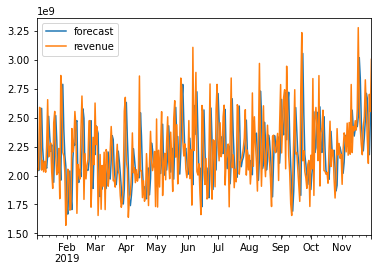

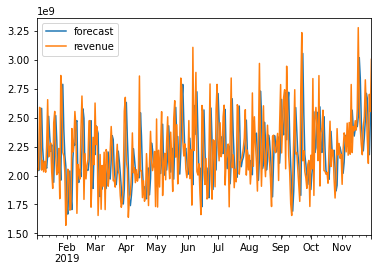

In [114]:
model_fit.plot_predict()

In [121]:
fore = model_fit.forecast(steps=1)
fore

(array([2.83852501e+09]),
 array([3.53789768e+08]),
 array([[2.14510981e+09, 3.53194022e+09]]))

In [116]:
# 2.83852501e+09 과 12월 1일의 값 비교 

In [117]:
mydata2 = mydata.drop(['Unnamed: 0',
 'datetime',
 'year',
 'month',
 'date',
 'dayofweek',
 'time',
 'hour',
 'minute',
 'holiday_1',
 'exposure',
 'mother_code',
 'name',
 'category',
 'price',
 'count',
 'sex',
 'installment',
 'code',
 'repeat',
 'm_temp',
 'l_temp',
 'h_temp',
 'precipitation',
 '역시즌 코드',
 '쇼 유무 코드'], axis=1)

In [118]:
mydata2 =  pd.pivot_table(mydata2, values='revenue', index=['holiday'],  aggfunc=np.sum)
mydata2

,revenue
holiday,
2019-01-01,2.712779e+09
2019-01-02,2.011023e+09
2019-01-03,2.062043e+09
2019-01-04,2.049394e+09
2019-01-05,2.588390e+09
...,...
2019-12-28,2.706958e+09
2019-12-29,2.706806e+09
2019-12-30,2.224920e+09


In [119]:
mydata2[:'2019-12-02']

,revenue
holiday,
2019-01-01,2.712779e+09
2019-01-02,2.011023e+09
2019-01-03,2.062043e+09
2019-01-04,2.049394e+09
2019-01-05,2.588390e+09
...,...
2019-11-28,2.701481e+09
2019-11-29,2.555253e+09
2019-11-30,3.003306e+09
